# Probabilistic Information Retrieval

In [1]:
!jupyter nbconvert --to html "naive_bayes.ipynb"

[NbConvertApp] Converting notebook naive_bayes.ipynb to html
[NbConvertApp] Writing 739088 bytes to naive_bayes.html


## Was bedeutet probabilistisch?

* Modellierung von Aussagen unter _Unsicherheit_ (uncertainty).
* Die Unsicherheit, bzw. Sicherheit wird durch Wahrscheinlichkeiten ausgedrückt.
* Kontext Information Retrieval:
  * Wie wahrscheinlich ist es, dass ein Dokument zu einer Abfrage passt?


## Motivation

* Implementierung eines Modells für die Klassifizierung von Dokumenten.
  * Das Modell lernt anhand der Daten, zu welcher Wahrscheinlichkeit ein Dokument zu welcher Klasse gehört.
  * Beispiel: RSS-News
    * 2 Klassen: Technische Nachrichten vs. Allgemeine Nachrichten
  * Dazu vergleichen wir die Verbundwahrscheinlichkeiten der einzelnen Token eines Dokuments für beide Klassen.

* Auch bekannt als "Spamfilter"-Anwendung:
  * Klassifikation in Spam und Ham.

## Inhalt:

1. Einführung in die Bayessche Statistik
2. Anwednung von Bayes bei Corona PCR-Tests
3. Naive Bayes Classifier
4. Evaluation des Classifiers

## Frequentistische Statistik vs. Bayessche Statistik

* Beispiel: die Gewinnrate einer Sportmannschaft: **Das Team verliert von 10 Spielen alle.**
  * Frequentistisch: die Gewinnrate beträgt $\frac{0}{10}=0$
    * heißt das nun, das Team wird und kann nie gewinnen?

  * Bayesscher Ansatz: es wurden niemals _alle_ Spiele der Mannschaft beobachtet.
    * Das bedeutet Unsicherheit.
    * Dadurch gibt es eine Unsicherheit, dass die Mannschaft alle Spiele verliert.
    * Je mehr Spiele die Mannschaft verliert, bzw. je mehr beobachtet wird, desto geringer wird die Unsicherheit.

* Gerade in mathematischen Modellen, die mit Daten trainiert wurden, kann der frequentischtische Ansatz Probleme bereiten.
* Beispiel hier:
  * kommt ein Token im Korpus nicht vor, heißt das nun, es existiert nicht?
  
* Die probabilistische Modellierung von aus Daten abgeleiteten Wissen, bietet daher die Möglichkeit, diese Unsicherheit auszudrücken.
* Ein weiterer Vorteil von probabilistischen Modellen ist z.B. die zusätzliche Auskunft, wie sicher etwa eine Vorhersage ist.
  * Beispiel für uns:
    * Eine Nachricht ist zu 0,7 technisch und zu 0,3 allgemein.

### Literatur

* [IR Book, Chapter 11](https://nlp.stanford.edu/IR-book/pdf/11prob.pdf)

# 1. Bayessche Statistik

* Benannt nach Thomas Bayes (engl. Mathematiker).

#### Schreibweise

* $A$: Ereignis / Zufallsvariable A. Kann in unserem Kontext ein Token oder Dokument sein.
* $P(A)$: Wahrscheinlichkeit, dass Ereignis A eintrifft.
* $P(A=hallo) = 0,7$: Die Wahrscheinlichkeit das A den Wert hallo annimmt ist 0,7.
* $P(A, B)$: Die Wahrscheinlichkeit, dass A und B eintreten.
* $P(A|k=technisch)$: Die bedingte Wahrscheinlichkeit, dass Dokument A der Klasse $k$ technisch angehört.

### Baumdiagramm für die Modellierung bedingter Wahrscheinlichkeiten

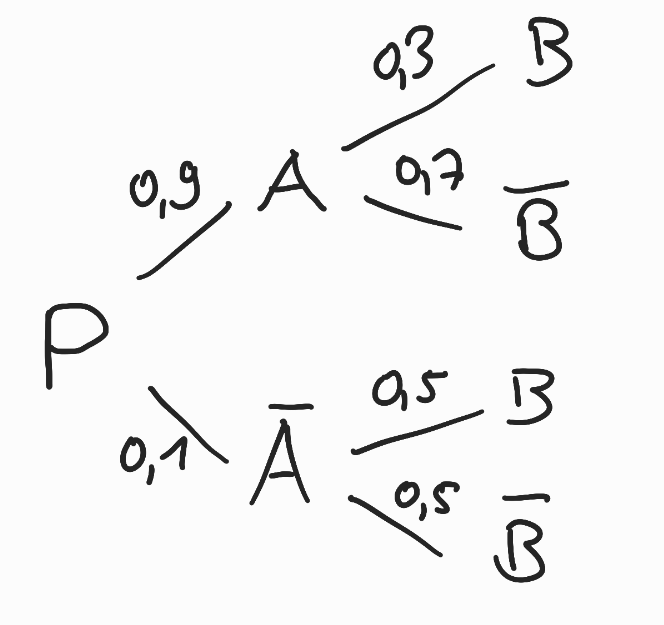

#### Was können wir daraus lesen?

* $P(A) = 0.9$
* $P(A, B) = 0,9 \cdot 0,3$
* $P(B|A) = 0,3$

Daraus ergibt sich:

$P(A,B) = P(A) \cdot P(B|A)$

und andersherum:

$P(A,B) = P(B) \cdot P(A|B)$


Setzt man dies nun gleich:

$$ P(A) \cdot P(B|A) = P(B) \cdot P(A|B) $$

erhält man das Bayes-Theorem (Bayes-Formel):

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}  $$

### Warum ist das Bayes Theorem so wichtig?

* oftmals kennen wir $P(B|A)$ suchen aber $P(A|B)$.

# 2. Beispiel anhand Corona PCR-Tests

#### Aufgabenstellung:
* Ist ein Corona PCR-Test negativ, bedeutet dies zu 99,5%, dass die Person auch tatsächlich negativ ist (Spezifität).
* Ist ein Corona PCR-Test positiv, bedeutet dies zu 98,8%, dass die Person auch tatsächlich infektiös ist (Sensivität).
* Am 1.1.2022 gab es in Deutschland ca. 200.000 Corona infizierte (Quelle: Google).

Frage: Wie hoch ist die Wahrscheinlichkeit, dass ich am 1.1.2022 einen positiven PCR-Test habe und **tatsächlich** infektiös bin?

* Dazu werden Variablen angelegt: $i$=infektiös, $p$=test-positiv
* Gesucht ist also die Wahrscheinlichkeit, infektiös zu sein unter der Bedingung einen positiven Test zu haben: $P(i|p)$

* $P(i)=\frac{200.000}{80.000.000}=0,0025$ 

Was wir sonst noch wissen:
* Spezifität: $P(\neg p | \neg i)=0,995$
* Sensitivität: $P(p | i)=0,988$

* Gesucht ist $P(i|p)$
* Das kann mit Bayes ausgedrückt werden:
$$ P(i|p) = \frac{P(p|i) \cdot P(i)}{P(p)}  $$

Was ist $P(p)$?

* Das sind also alle Fälle in denen ein Test positiv ist, egal ob die Person wirklich infektiös ist.
* Das heißt:
$$ P(p) = P(p|i) \cdot P(i) + P(p|\neg i) \cdot P(\neg i)$$


$$ P(p) = 0,988 \cdot 0,0025 +  (1-0,995)  \cdot (1-0,0025) $$

In [6]:
P_p = 0.988 * 0.0025 + (1-0.995) * (1-0.0025)
print("P(p) =", P_p)

P(p) = 0.007457500000000005


Das ergibt dann mit dem Bayes-Theorem:
$$ P(i|p) = \frac{P(p|i) \cdot P(i)}{P(p)} = \frac{0,988 \cdot 0,0025}{0,0075}  $$

In [14]:
P_pi = 0.988 * 0.0025 / 0.0075
print("P(i|p) ist", P_pi)

P(i|p) ist 0.32933333333333337


### Fazit:
* Wenn ich also einen positiven PCR bekomme, hieße das nur zu ca. 33%, dass ich auch wirklich positiv bin.
* Dies liegt daran, dass der infektiöse Anteil der Bevölkerung, also $P(i)$ so klein ist.
* Deshalb entschied die Bundesregierung PCR-Tests nur bei positiven Schnelltests anzuwenden. Dadurch wird eine Vorauswahl an Testpersonen getroffen und $P(i)$ für die Testgruppe erhöht.


* Wir sehen also: obwohl PCR-Tests sehr hohe Genauigkeiten aufweisen, können die Ergebnisse durch Umstände verzerrt werden.

* A-priori:
  * Das "Vorwissen", also z.B. $p(i)$ wird in der Bayesschen-Statistik als a-priori Wahrscheinlichkeit bezeichnet
* A-posteriori:
  * Dies ist das abgeleitete Wissen, also z.B. $P(i|p)$.

# 3. Der Naive Bayes Classifier

* Modell für die Klassifizierung
  * Wiederholung: Überwachtes Lernen
    * Das heißt: Wird trainieren hier ein Modell mit Daten und zugehöriger Zielgröße.


* Im praktischen Beispiel soll dieses Modell lernen, die RSS-News Feeds nach der Kategorie $cat$ _tech_ oder _nontech_ zu unterscheiden.
* Der Classifier nimmt ein beliebiges Dokument $d$ entgegennehmen und berechnet die a-posteriori Wahrscheinlichkeit $P(cat|d)$.
  * Die Klassifizierung ist dann die Klasse mit der größten Wahrscheinlichkeit.

### Warum ist der Naive Bayes Classifier "naiv"?

* Es wird angenommen, einzelne Tokens bedingen sich nicht gegenseitig, also alle Wörter sind voneinander unabhängig.
* Das stimmt natürlich nicht, deshalb ist das Modell "naiv".
* Das vereinfacht das Modell jedoch drastisch, und die Ergebnis sind trotzdem praktikabel.

## Training - der Lernprozess



1. Die Methode ``train`` nimmt ein Dokument und seine Klasse entgegen.
2. Das Dokument wird in seine Tokens aufgetrennt.
3. Erhöhung des Zählers für die entsprechende Klasse für z.B. $P(cat=tech)$, (``inc_cat_freq``).
4. Erhöhung des Zählers für jedes Token in der entsprechenden Klasse. Daraus lässt sich dann $P(t|cat)$ ableiten, (``inc_word_freq``).
5. Wiederhole 1-4 für alle Dokumente aus dem Trainingsset.

## Die Vorhersage

* Ist das Training des Modells abgeschlossen, können Vorhersagen gemacht werden.
* Zugrunde liegt die Berechnung von $P(t|cat)$ (``word_prob``).
* Kam ein Token im Training jedoch selten oder gar nicht vor, liefert dies extreme Werte. Deshalb wird ein sogenanntes Smoothing angewendet (weighted probability). Dabei erhält ein unbekanntes Token den initialien Wert von 0,5. Je öfter ein Token vorkam ($n$), desto geringer wird der Einfluss des initialien Wertes:


$$wprob(t)=\frac{0,5+n \cdot P(t|cat)}{1+n}$$
* Für $n=0$ ist dies 0,5.

* Die Wahrscheinlichkeit, dass nun ein Dokument $d$ der Klasse $cat$ angehört, ist die Verbundwahrscheinlichkeit (Produkt) der gewichteten a-posteriori-Wahrscheinlichkeiten $wprob$ seiner $m$ Tokens für $cat$.
$$ P(cat|d) = \prod^{m}_{i=0}{wprob(i)} $$

#### Beispielrechnung:

* Es wird für jede Klasse die Verbundwahrscheinlichkeit aller Tokens berechnet. In diesem Beispiel hat $d$ 4 Tokens.
  * $$P(cat=tech|d) = 0,5 \cdot 0,1 \cdot 0.3 \cdot 0,65 = 0.00975 $$
  * $$P(cat=nontech|d) = 0,3 \cdot 0,9 \cdot 1 \cdot 0,5 = 0.135 $$
* In diesem Fall würde das Modell also für die Klasse _nontech_ entscheiden, da die Wahrscheinlichkeit dafür größer ist.

### Ergänzung: Das Problem mit der Verbundwahrscheinlichkeit

* Die bedingten Wahrscheinlichkeiten $P(t|cat)$ liegen immer im Intervall $[0,1]$.
* Je mehr Werte kleiner 0 miteinander multipliziert werden, desto kleiner wird das Produkt.
* Bei größeren Dokumenten (bereits ab wenigen 100 Tokens) konvergiert das Produkt gegen 0 und wird daher unbrauchbar.
* Um diesem _numerischen Underflow_ entgegenzukommen, wird häufig der natürliche Logarithmus (ln) angewandt.
* Nach dem Logarithmusgesetzt wird so aus dem Produkt eine Summe:
$$ P(cat|d) = \sum^{m}_{i=0}{ln\,(\,wprob(i)\,)} $$
* Durch die Umformung entstehen nur negative Summen. Nach wie vor wird für die Klasse mit dem größeren Wert entschieden.

## Vorverarbeitung

* Schritt 1 und 2: alles wie immer...
* Schritt 3 und 4 werden hier nicht benötigt.

In [1]:
import numpy as np
import pandas as pd
import random
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from tqdm.notebook import tqdm

In [2]:
stopwords_german = set(stopwords.words("german"))
tokenizer = RegexpTokenizer("\w+")

def tok(text):
    tokens = tokenizer.tokenize(text)
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t not in stopwords_german]
    return tokens

In [3]:
DATA_NONTECH = "../../data/news/rss-nontech.txt"
DATA_TECH = "../../data/news/rss-tech.txt"

# set seed to get same results
random.seed(42)

def load_files(path):
    with open(path, "r", encoding="utf8") as f:
        data = f.read()
        data = data.split("\n")
    data = list(set(data))
    # filter empty documents
    data = [d for d in data if len(d) > 0]
    random.shuffle(data)
    return data

In [4]:
data = {"tech": load_files(DATA_TECH),
        "nontech": load_files(DATA_NONTECH)
       }

## Data splitting

* Wie bereits erwähnt, gehört die Klassifikation im maschinellen Lernen zum überwachten Lernen.
* Um zu überprüfen, ob das Modell die Daten nicht nur auswendig gelernt hat, teilen wir die Daten in ein Trainings und ein Testset auf.
  * Damit wird z.B. auch sichergestellt, dass ein Over- bzw. Underfitting ausgeschlossen werden kann.
* Üblich sind dabei Aufteilungen 75:25 oder 80:20.
* Damit die Daten zufällig verteilt sind, wurden sie zuvor zufällig nach Klasse geordnet (``random.shuffle``).

In [5]:
SPLIT = 0.8

split_point_tech = round(len(data["tech"]) * SPLIT)
X_tech_train = data["tech"][:split_point_tech]
X_tech_test = data["tech"][split_point_tech:]

split_point_nontech = round(len(data["nontech"]) * SPLIT)
X_nontech_train = data["nontech"][:split_point_nontech]
X_nontech_test = data["nontech"][split_point_nontech:]

In [6]:
class NaiveBayesClassifier:

    def __init__(self, categories, tokenize):
        self.categories = categories
        self.tokenize = tokenize
        self.vocab = {}
        self.class_count = {}
        for cat in categories:
            self.class_count[cat] = 0

    def inc_word_freq(self, word, cat):
        if word not in self.vocab:
            self.vocab[word] = {}
            for cat in self.categories:
                self.vocab[word][cat] = 0

        self.vocab[word][cat] += 1

    def inc_cat_freq(self, cat):
        self.class_count[cat] += 1

    def word_freq(self, word, cat):
        try:
            return self.vocab[word][cat]
        except KeyError:
            return 0

    def word_freq_total(self, word):
        return sum([self.word_freq(word, cat) for cat in self.categories])

    def cat_count(self, cat):
        return self.class_count[cat]

    def total_count(self):
        return sum(self.class_count.values())

    def train(self, item, cat):
        # tokenize
        tokens = self.tokenize(item)
        self.inc_cat_freq(cat)
        for token in tokens:
            self.inc_word_freq(token, cat)

    def word_prob(self, word, cat):
        # P(word|cat)
        return self.word_freq(word, cat) / self.cat_count(cat)

    def word_prob_weighted(self, word, cat, init_count=0.5):
        word_count = self.word_freq_total(word)
        return (init_count + word_count * self.word_prob(word, cat)) / (1 + word_count)


    def prob(self, doc):
        tokens = self.tokenize(doc)
        res = {}
        for cat in self.categories:
            probs = 1
            for token in tokens:
                probs *= self.word_prob_weighted(token, cat)
            res[cat] = probs
        total = sum(res.values())
        return {k: v/total for k, v in res.items()}

    def log_prob(self, doc):
        tokens = self.tokenize(doc)
        res = {}
        for cat in self.categories:
            probs = 1
            for token in tokens:
                probs += np.log(self.word_prob_weighted(token, cat))
            res[cat] = probs
        total = sum(res.values())
        return {k: 1 - v/total for k, v in res.items()}


In [8]:
a = -5
b = -8
1 - b / (a+b)

0.3846153846153846

In [7]:
classifier = NaiveBayesClassifier(categories=["tech", "nontech"], tokenize=tok)

In [8]:
# train tech
for t in X_tech_train:
    classifier.train(t, "tech")
for t in X_nontech_train:
    classifier.train(t, "nontech")

### Erste Einblicke in das trainierte Modell

In [9]:
classifier.word_prob_weighted("windows", "tech")

0.19953416149068323

In [10]:
classifier.word_prob_weighted("windows", "nontech")

0.02214285714285714

Das ist ein gutes Ergebnis, die Wahrscheinlichkeit für _Windows_ ist viel größer in der Kategorie tech.

#### Wie verhält es sich für ein ganzes Dokument?

In [44]:
X_nontech_test[0]

'Umfrage sieht Linksruck bei französischer Parlamentswahl im Juni Frankreichs Präsident Macron kann laut einer aktuellen Umfrage bei der Parlamentswahl weiterhin mit einer Mehrheit rechnen. Das neue linke Bündnis aus Linkspartei, Sozialisten und Grünen könnte aber einen starken Zuwachs erreichen. In der Befragung gibt es einen klaren Verlierer.'

In [43]:
classifier.prob(X_nontech_test[0])

{'tech': 0.3514569835717479, 'nontech': 0.6485430164282521}

#### Wie verhält es sich für ein erfundenes Dokument?

In [11]:
document = "Das ist ein Artikel über das neue Windows 11."

In [12]:
classifier.prob(document)

{'tech': 0.9536221802145787, 'nontech': 0.046377819785421326}

In [13]:
document = "Scholz will nicht nach Kiew reisen."

In [14]:
classifier.prob(document)

{'tech': 0.1474082356435297, 'nontech': 0.8525917643564703}

#### Experiment: Machen wir es dem Modell schwer

In [15]:
document = "Scholz will nicht nach Kiew reisen, weil sein Google Pixel kein Internet hat."

In [16]:
classifier.prob(document)

{'tech': 0.4327676575362227, 'nontech': 0.5672323424637773}

* Das Modell entscheidet sich für die Klasse tech im Gegensatz zu vorher.
* Jedoch ist diese Entscheidung sehr knapp bemessen.

# 4. Evaluation

* Die Evaluation ist auch hier äußerst wichtig um die Performanz des Modells zu überprüfen.

In [17]:
tokens = tok(document)
result = pd.DataFrame(columns=["tech", "nontech"])
for t in tokens:
    tech = classifier.word_prob_weighted(t, "tech")
    nontech = classifier.word_prob_weighted(t, "nontech")
    result = result.append({"tech": tech, "nontech": nontech}, ignore_index=True)
result.index = tokens

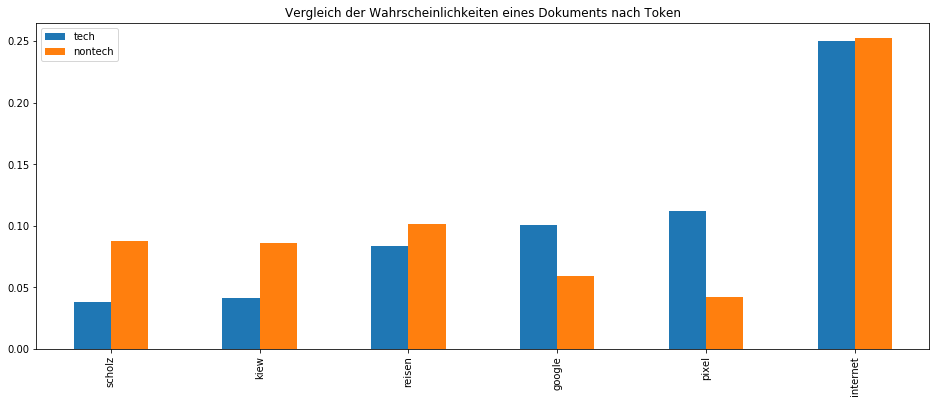

In [18]:
result.plot.bar(title="Vergleich der Wahrscheinlichkeiten pro Klasse eines Dokuments nach Token", figsize=(16,6))

### Was sehen wir?

* Das Token _internet_ hat für beide Klasse den größten Einfluss.
* Die Tokens _scholz_ und _kiew_ ordnet das Modell der Klasse _nontech_ zu.
* Die Tokens _google_ und _pixel_ werden der Klasse _tech_ zugeordnet.
* Die Tokens _reisen_ und _internet_ dagegen haben kaum Einfluss auf die Wahl der Klasse.

* Im Beispiel hier hat es das Modell sehr schwer.
* Im Dokument kommen Tokens die normalerweise signifikant für eine der beiden Klassen sind vor.


#### Für welche Klasse würden Sie denn entscheiden?

## Evluation anhand von Metriken

* Das Modell wird nun auf den zurvor abgesonderten Testdaten überprüft, die es im Training nie gesehen hat.
* Dazu werden verschiedene Metriken berechnet. Dafür definieren wir folgende Variablen:
  * $TT$: Die richtig klassifizierten Dokumente der Klasse Tech
  * $TN$: Die richtig klassifizierten Dokumente der Klasse Non-Tech
  * $FT$: Die falsch klassifizierten Dokumente der Klasse Tech
  * $FN$: Die falsch klassifizierten Dokumente der Klasse Non-Tech
  * $N$: alle Dokumente

### Die Genauigkeit (Accuracy)

* Eine wichtige, und wohl die naheliegendste Evaluationsmetrik einer Klassifizierung, ist die Genauigkeit.
* Sie wird berechnet:
$$ acc=\frac{TT+TN}{N} $$
* Sie beschreibt den Anteil aller korrekt klassifizierten Dokumente.

In [42]:
# claculate the metrics
def evaluation(classifier, test_tech, test_nontech):
    acc_tech = {"tech": 0, "nontech": 0}
    acc_nontech = {"tech": 0, "nontech": 0}

    for tech in test_tech:
        res = classifier.prob(tech)
        if res["tech"] > res["nontech"]:
            acc_tech["tech"] += 1
        else:
            acc_tech["nontech"] += 1

    for nontech in test_nontech:
        res = classifier.prob(nontech)
        if res["tech"] > res["nontech"]:
            acc_nontech["tech"] += 1
        else:
            acc_nontech["nontech"] += 1

    print("Tech:", acc_tech)
    print("Non-Tech:", acc_nontech)

    acc_tech_percent = acc_tech['tech'] / (sum(acc_tech.values()))
    acc_nontech_percent = acc_nontech['nontech'] / (sum(acc_nontech.values()))
    acc_total = (acc_tech['tech'] + acc_nontech['nontech']) / (sum(acc_tech.values()) + sum(acc_nontech.values()))

    print(f"Accuracy Total {acc_total}")
    print(f"Accuracy Tech {acc_tech_percent}")
    print(f"Accuracy Non-Tech {acc_nontech_percent}")


evaluation(classifier, X_tech_test, X_nontech_test)


Tech: {'tech': 29, 'nontech': 6}
Non-Tech: {'tech': 8, 'nontech': 48}
Accuracy Total 0.8461538461538461
Accuracy Tech 0.8285714285714286
Accuracy Non-Tech 0.8571428571428571


* Eine Accuracy von 84,6% ist schonmal nicht schlecht!
* Die Accuracy für nontech-Dokumente ist marginal besser.

### Die Konfusions-Matrix

* Die Konfusionsmatrix ist eine wichtige Übersicht für die Evaluation einer Klassifizierung
* Es werden die Werte der vorhergesagten Klassen und der tatsächlichen Klassen gegenüber gestellt.
* Es wird dadurch schnell deutlich, ob die Qualität der Vorhersagen für bestimmte Klassen variieren.
  * Beispiel Viren Scanner: hier möchte man vor allem die falsch negativ Werte optimieren, also dass ein Virus nicht erkannt wird.
* Daher ist es wichtig, sich die Performanz des trainierten Modells auch nach Klasse anzuschauen.

In [24]:
d = pd.DataFrame([[29, 6], [8, 48]])

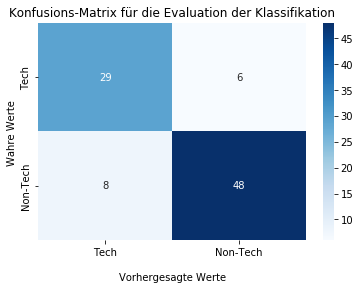

In [25]:
import seaborn as sns

ax = sns.heatmap(d, annot=True, cmap='Blues')
b
ax.set_title('Konfusions-Matrix für die Evaluation der Klassifikation');
ax.set_xlabel('\nVorhergesagte Werte')
ax.set_ylabel('Wahre Werte ');

ax.xaxis.set_ticklabels(['Tech','Non-Tech'])
ax.yaxis.set_ticklabels(['Tech','Non-Tech'])
plt.show()

#### Zur Konfusionsmatrix

* Die Summe der Zeilen ergibt immer die Anzahl Dokumente der Klasse.
* Die Spalten sind die vorhergesagten Werte.
  * Im Beispiel für die Klasse tech heißt das, von 35 Dokumente wurden 29 korrekt klassifiziert und 6 nicht.
* Die Zeilen bilden ab, wie viele Dokumente für eine Klasse vorhergesagt wurden.

Die Variablen von zuvor würden so auf die Konfusionsmatrik verteilt werden:
    
|TT|FT| 
|----|-----|
|FN|TN|

* Um die Performanz nach Klasse zu bewerten sind die Metriken _Precision_ und _Recall_ wichtig. Sie werden pro Klasse berechnet.
* Precision (Spezifität, Falsch-Positiv-Rate) für die Klasse tech:
$$ precision = \frac{TT}{TT + FT}  $$
  * "Zeilenweise"
* Recall (Sensitivität, Falsch-Negativ-Rate) für die Klasse tech:
$$ recall = \frac{TT}{TT + FN}  $$
  * "Spaltenweise"


In [39]:
metrics = pd.DataFrame(columns=["precision", "recall"])

precision_tech = d[0][0] / (d[0][0] +  d[1][0])
recall_tech = d[0][0] / (d[0][0] +  d[0][1])
precision_nontech = d[1][1] / (d[1][1] +  d[0][1])
recall_nontech = d[1][1] / (d[1][1] +  d[1][0])

metrics = metrics.append({"precision": precision_tech, "recall": recall_tech}, ignore_index=True)
metrics = metrics.append({"precision": precision_nontech, "recall": recall_nontech}, ignore_index=True)
metrics.index = ["tech", "nontech"]

In [40]:
metrics

,precision,recall
tech,0.828571,0.783784
nontech,0.857143,0.888889


* Die Klasse nontech hat für beide Metriken bessere Werte. Das spiegelt auch die Accuracy für diese Klasse wieder.
* Die Klasse nontech hat einen besseren Recall und eine etwas bessere Precision als tech.
* Durch den Recall sehen wir, es werden also prozentual mehr Dokumente fälschlicherweise tech zugeordnet als nontech.
  * Beeinflusst wird dies jedoch auch dadurch, dass die Klasse nontech mehr Dokumente enthält.


* Im Beispiel hier sind die Unterschiede nicht allzu groß, zudem haben wir keinen kirtischen Usecase bei dem wir einen bestimmten Wert drastisch optimieren müssen wie etwa Viruserkennung oder medizinischen Tests.

# Fazit

* Der Naive Bayes Classifier ist ein einfaches Modell mit recht guter Wirkung.
* Jedoch auch hier: keine Semantik. Die Wahrscheinlichkeiten werden basierend der Häufigkeit des Auftretens der Tokens berechnet.
* Unser Ergebnis hier ist schon recht gut.
  * Für die Überprüfung ist daher immer ein Testset erforderlich, dass das Modell im Training _nie_ gesehen hat.
  * Anschließend haben wir dazu verschiedene Metriken berechnet.

#### Was ist mit den falsch Klassifizierten?

* Sind alle Dokumente der richtigen Klasse zugewiesen?
* Es kann sein, dass es technische Nachrichten gibt, die auch über allgemeines berichten und umgekehrt. Dann fällt es dem Modell schwer, bzw. würde auch uns Menschen schwer fallen.

# Aufgaben

Optimieren Sie das Modell!
* Überlegen Sie, welche Schritte die Accuracy des Modells verbessern könnten.
* Schauen Sie sich dazu die falsch klassifizierten Dokumente an.
  * Was sind das für Dokumente?
  * Erkennen Sie in diesem ein Muster bzw. Auffälligkeiten warum Sie falsch klassifiziert wurden?
  * Dazu können Sie auch die Wahrscheinlichkeiten einzelner Tokens untersuchen.

* Passen Sie die Vorverarbeitung an.
  * Schlagen Sie die Accuracy aus dem Beispiel hier?

In [47]:
for t in tok(X_nontech_test[0]):
    print(t, ":", round(classifier.word_prob_weighted(t, "tech"),3), "vs", round(classifier.word_prob_weighted(t, "nontech"),3))

elon : 0.069 vs 0.086
musk : 0.072 vs 0.07
künftig : 0.117 vs 0.104
republikaner : 0.167 vs 0.173
stimmen : 0.167 vs 0.173
tesla : 0.13 vs 0.132
gründer : 0.5 vs 0.5
wirft : 0.25 vs 0.252
us : 0.065 vs 0.071
demokraten : 0.167 vs 0.173
vereinigten : 0.25 vs 0.252
staaten : 0.083 vs 0.102
spalten : 0.5 vs 0.5
rechte : 0.5 vs 0.5
abgeordnete : 0.1 vs 0.114
unterstützerin : 0.5 vs 0.5
donald : 0.167 vs 0.173
trumps : 0.167 vs 0.173
lobte : 0.5 vs 0.5
äußerungen : 0.5 vs 0.5
willkommen : 0.5 vs 0.5
richtigen : 0.5 vs 0.5
seite : 0.25 vs 0.252
elon : 0.069 vs 0.086


In [42]:
for t in tok(test_nontech[0]):
    print(t, ":", classifier.word_prob_weighted(t, "nontech"))

ukraine : 0.1918753193663771
konflikt : 0.14684466019417475
russland : 0.12808065720687078
erklärt : 0.13106796116504854
militärmanöver : 0.25485436893203883
krim : 0.12378640776699029
beendet : 0.1796116504854369
russland : 0.12808065720687078
weiteren : 0.1796116504854369
truppenabzug : 0.25485436893203883
grenzgebiet : 0.14684466019417475
ukraine : 0.1918753193663771
gemeldet : 0.25485436893203883
soldaten : 0.1796116504854369
kehrten : 0.25485436893203883
demnach : 0.1796116504854369
übung : 0.25485436893203883
krim : 0.12378640776699029
zurück : 0.14684466019417475
